In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# loaded dataset Summary
print("Train: ", "x = ", x_train.shape, " y ", y_train.shape)
print("Test: ", "x = ", x_test.shape, " y ", y_test.shape)

11493376/11490434 [==============================] - 13s 1us/step
Train:  x =  (60000, 28, 28)  y  (60000,)
Test:  x =  (10000, 28, 28)  y  (10000,)


In [5]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

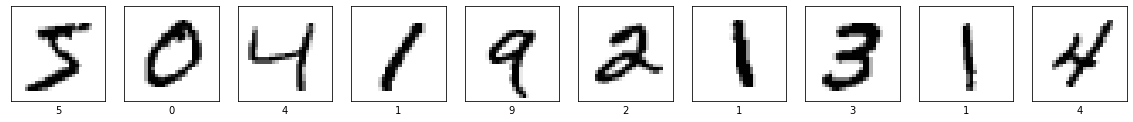

In [10]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

In [11]:
# Reshape the dataset to have a single cahnnel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))     ## Softmax Activation Function is used for classification
model.add(layers.Dense(10, activation = 'softmax'))  ## Here Number of Neurons is 10 because we have 10 digits to classify                                        

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [20]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10


C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 107s 55ms/step - loss: 0.1546 - accuracy: 0.9526 - val_loss: 0.0528 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0388 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0416 - val_accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0262 - val

In [21]:
# Saving the trained Model
model.save('my_model_digits.h5')
print("Saved Model to Disk")

Saved Model to Disk


In [ ]:
## Loading the saved model
from tensorflow.keras.model import load_model
model = load_model('my_model_digits.h5')

In [24]:
# make a prediction for a new image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load and Prepare the image
def load_image(filename):
    # Load the image
    img = load_img(filename, grayscale = True, target_size = (28,28))
    # Convert to array
    img = img_to_array(img)
    # Reshape it into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Prepare Pixel data as we have done above while preparing the data
    img = img.astype('float')
    img = img/255
    return img

# Load an image and predict the class
def predict_sample():
    #load the image
    img = load_image('7.png')
    # Load model
    model = load_model('my_model_digits.h5')
    # Predict the Class
    digit = model.predict_classes(img)
    print(digit[0])
    
predict_sample()
    

7


In [25]:
# Evaluate the model

313/313 - 4s - loss: 0.0338 - accuracy: 0.9918


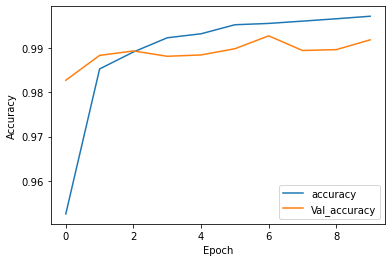

In [27]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

In [28]:
print(test_acc)

0.9918000102043152
